## 数据挖掘大作业
### 数据集
* 纽约市2020年1月出租车载客记录
* 纽约市出租车服务分区地图

数据预处理

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn import datasets
from sklearn.cluster import KMeans

In [3]:
# 导入出租车载客记录
df = pd.read_csv("./出租车载客记录.csv")
df

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3166: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


In [4]:
# 删除非2020年1月的数据
def remove(x):
    if x.startswith("2020-01"):
        return x
    else:
        return 'other'

df['tpep_pickup_datetime'] = df['tpep_pickup_datetime'].apply(lambda x: remove(x))
df.drop(df[df.tpep_pickup_datetime == 'other'].index, inplace=True)
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1.0,2020-01-01 00:28:15,2020-01-01 00:33:03,1.0,1.20,1.0,N,238,239,1.0,6.00,3.00,0.5,1.47,0.00,0.3,11.27,2.5
1,1.0,2020-01-01 00:35:39,2020-01-01 00:43:04,1.0,1.20,1.0,N,239,238,1.0,7.00,3.00,0.5,1.50,0.00,0.3,12.30,2.5
2,1.0,2020-01-01 00:47:41,2020-01-01 00:53:52,1.0,0.60,1.0,N,238,238,1.0,6.00,3.00,0.5,1.00,0.00,0.3,10.80,2.5
3,1.0,2020-01-01 00:55:23,2020-01-01 01:00:14,1.0,0.80,1.0,N,238,151,1.0,5.50,0.50,0.5,1.36,0.00,0.3,8.16,0.0
4,2.0,2020-01-01 00:01:58,2020-01-01 00:04:16,1.0,0.00,1.0,N,193,193,2.0,3.50,0.50,0.5,0.00,0.00,0.3,4.80,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6405003,NaN,2020-01-31 22:51:00,2020-01-31 23:22:00,NaN,3.24,NaN,NaN,237,234,NaN,17.59,2.75,0.5,0.00,0.00,0.3,21.14,0.0
6405004,NaN,2020-01-31 22:10:00,2020-01-31 23:26:00,NaN,22.13,NaN,NaN,259,45,NaN,46.67,2.75,0.5,0.00,12.24,0.3,62.46,0.0
6405005,NaN,2020-01-31 22:50:07,2020-01-31 23:17:57,NaN,10.51,NaN,NaN,137,169,NaN,48.85,2.75,0.0,0.00,0.00,0.3,51.90,0.0
6405006,NaN,2020-01-31 22:25:53,2020-01-31 22:48:32,NaN,5.49,NaN,NaN,50,42,NaN,27.17,2.75,0.0,0.00,0.00,0.3,30.22,0.0


### 1、哪些区域内的出租车载客上客点人数最多？

In [18]:
df_PULocationID = df[['PULocationID']] # 提取上车点
d_PULocation = {'PULocationID':df_PULocationID['PULocationID'].value_counts().index, 'count':df_PULocationID['PULocationID'].value_counts()}
df_PULocationID_count = pd.DataFrame(data=d_PULocation).reset_index(drop=True) # 计算每个ID有多少记录
df_PULocationID_count

,PULocationID,count
0,237,292989
1,161,282213
2,236,272592
3,162,235602
4,186,228746
...,...,...
256,176,2
257,105,2
258,30,1
259,172,1


### 2、哪些区域内的出租车载客下客点人数最多？

In [19]:
df_DOLocationID = df[['DOLocationID']] # 提取下车点
d_DOLocation = {'DOLocationID':df_DOLocationID['DOLocationID'].value_counts().index, 'count':df_DOLocationID['DOLocationID'].value_counts()}
df_DOLocationID_count = pd.DataFrame(data=d_DOLocation).reset_index(drop=True) # 计算每个ID有多少记录
df_DOLocationID_count

,DOLocationID,count
0,236,289289
1,237,263588
2,161,249719
3,170,196877
4,162,194146
...,...,...
257,204,33
258,99,16
259,2,7
260,105,3


### 3、哪些时间段是出租车上下客的高峰期？

#### 首先，分析上车高峰期

In [4]:
# 提取上车时间段
df_PUTime = df[['tpep_pickup_datetime']]
df_PUTime

,tpep_pickup_datetime
0,2020-01-01 00:28:15
1,2020-01-01 00:35:39
2,2020-01-01 00:47:41
3,2020-01-01 00:55:23
4,2020-01-01 00:01:58
...,...
6405003,2020-01-31 22:51:00
6405004,2020-01-31 22:10:00
6405005,2020-01-31 22:50:07
6405006,2020-01-31 22:25:53


In [5]:
# 提取时间段，构造date和hour字段
df_PUTime['date'] = df_PUTime['tpep_pickup_datetime'].apply(lambda x: x.split(' ')[0])
df_PUTime['hour'] = df_PUTime['tpep_pickup_datetime'].apply(lambda x: x.split(' ')[1].split(':')[0])
df_PUTime

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,tpep_pickup_datetime,date,hour
0,2020-01-01 00:28:15,2020-01-01,00
1,2020-01-01 00:35:39,2020-01-01,00
2,2020-01-01 00:47:41,2020-01-01,00
3,2020-01-01 00:55:23,2020-01-01,00
4,2020-01-01 00:01:58,2020-01-01,00
...,...,...,...
6405003,2020-01-31 22:51:00,2020-01-31,22
6405004,2020-01-31 22:10:00,2020-01-31,22
6405005,2020-01-31 22:50:07,2020-01-31,22
6405006,2020-01-31 22:25:53,2020-01-31,22


In [7]:
df_PUTime_count = pd.DataFrame(df_PUTime.groupby(['date','hour']).count())
df_PUTime_count

tpep_pickup_datetime
date       hour                      
2020-01-01 00                   13240
           01                   15061
           02                   13540
           03                    9830
           04                    6218
...                               ...
2020-01-31 19                   15067
           20                   13339
           21                   13728
           22                   12380
           23                   11503

[744 rows x 1 columns]

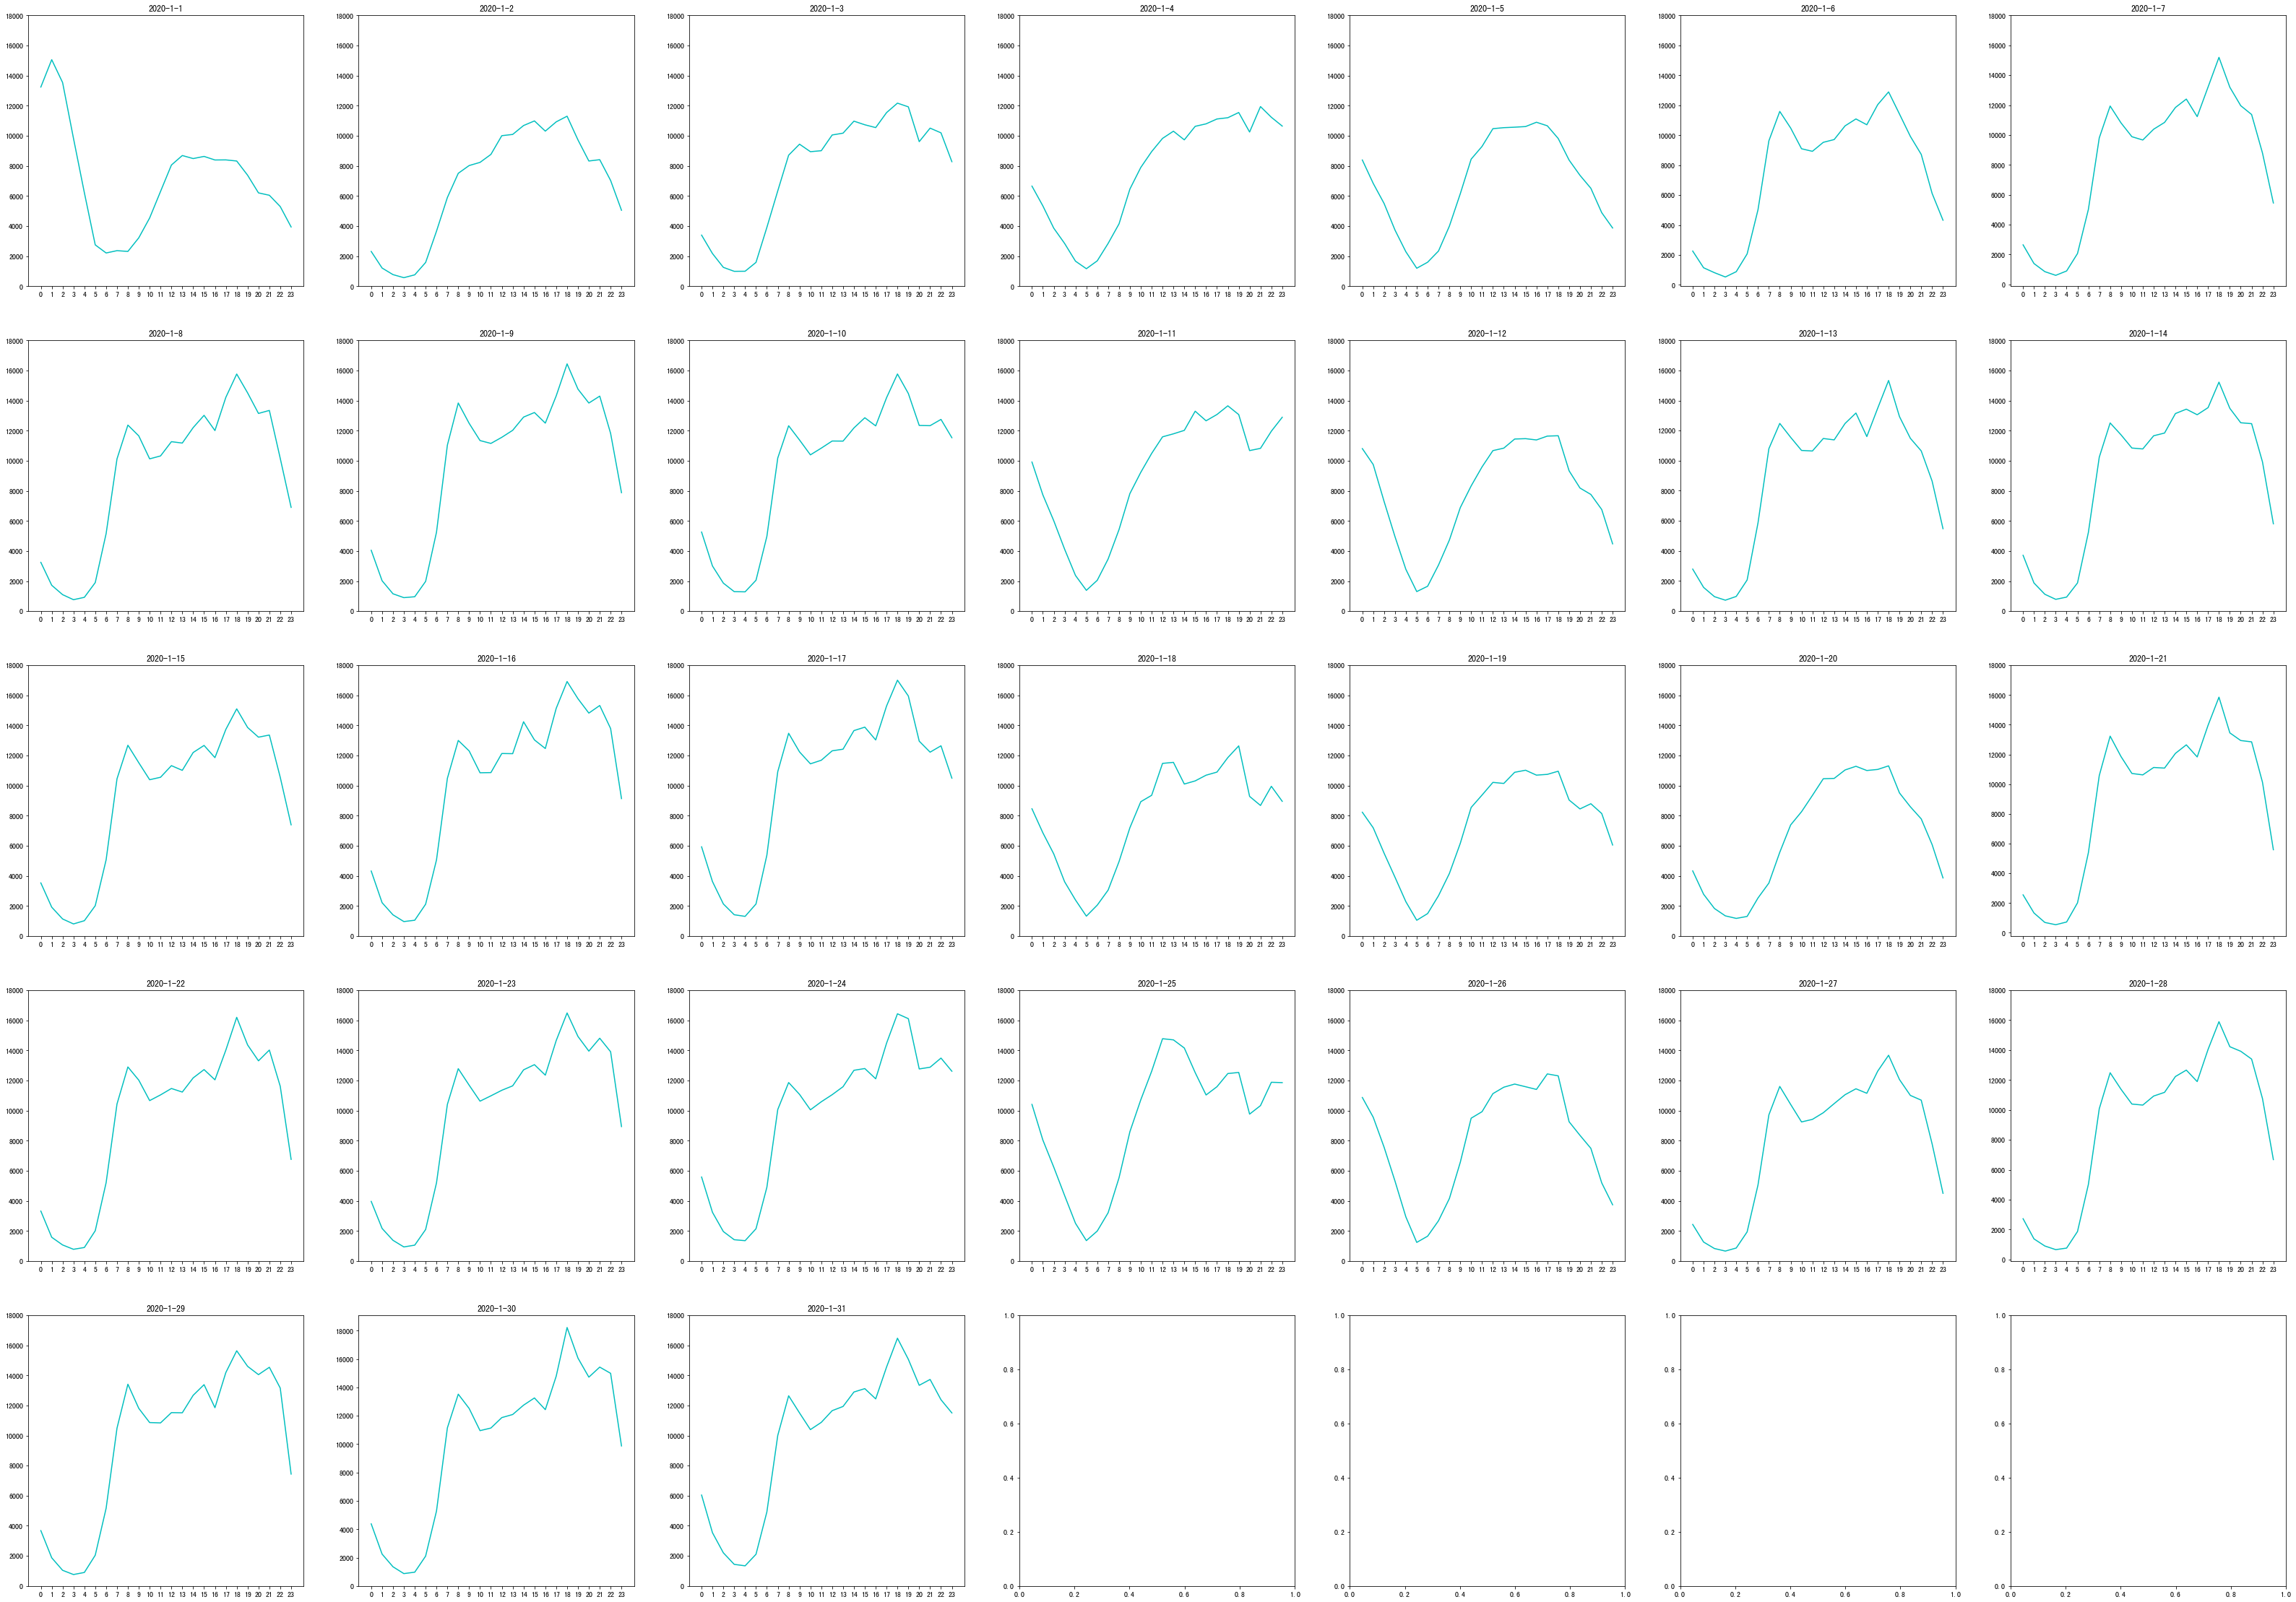

In [64]:
y_all = []
for i in range(31): # 每一天的记录
    y = df_PUTime_count[(i*24):((i+1)*24)].values # 0~23点的上车人数
    y = y.reshape(24).tolist()
    y_all.append(y)

# 可视化
fig,axes = plt.subplots(5, 7, figsize=(56, 40))
for i in range(5):
    for j in range(7):
        if (i*7 + j)>30:
            break
        ax = axes[i, j]
        x = list(range(0,24))
        y = y_all[i*7 + j]
        ax.plot(x,y,color='c')
        ax.set_xticks(x)
        ax.set_yticks(range(0,20000,2000))
        ax.set_title("2020-1-"+str(i*7 + j + 1))

通过图形可以看到，大体上，上客人数在每天的8点和18点左右呈现出两个峰值，即早高峰和晚高峰。

而通过观察可以发现，1月1日的数据与其他日期有着明显的不同，猜测分析是因为1月1日是跨年夜，许多人在凌晨的时候出行游玩，所以数据出现反常现象。其次是周末，通过查阅日历发现，1月4、5日及每7天后为周末，峰值明显较小。

#### 接下来，分析下客高峰期

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


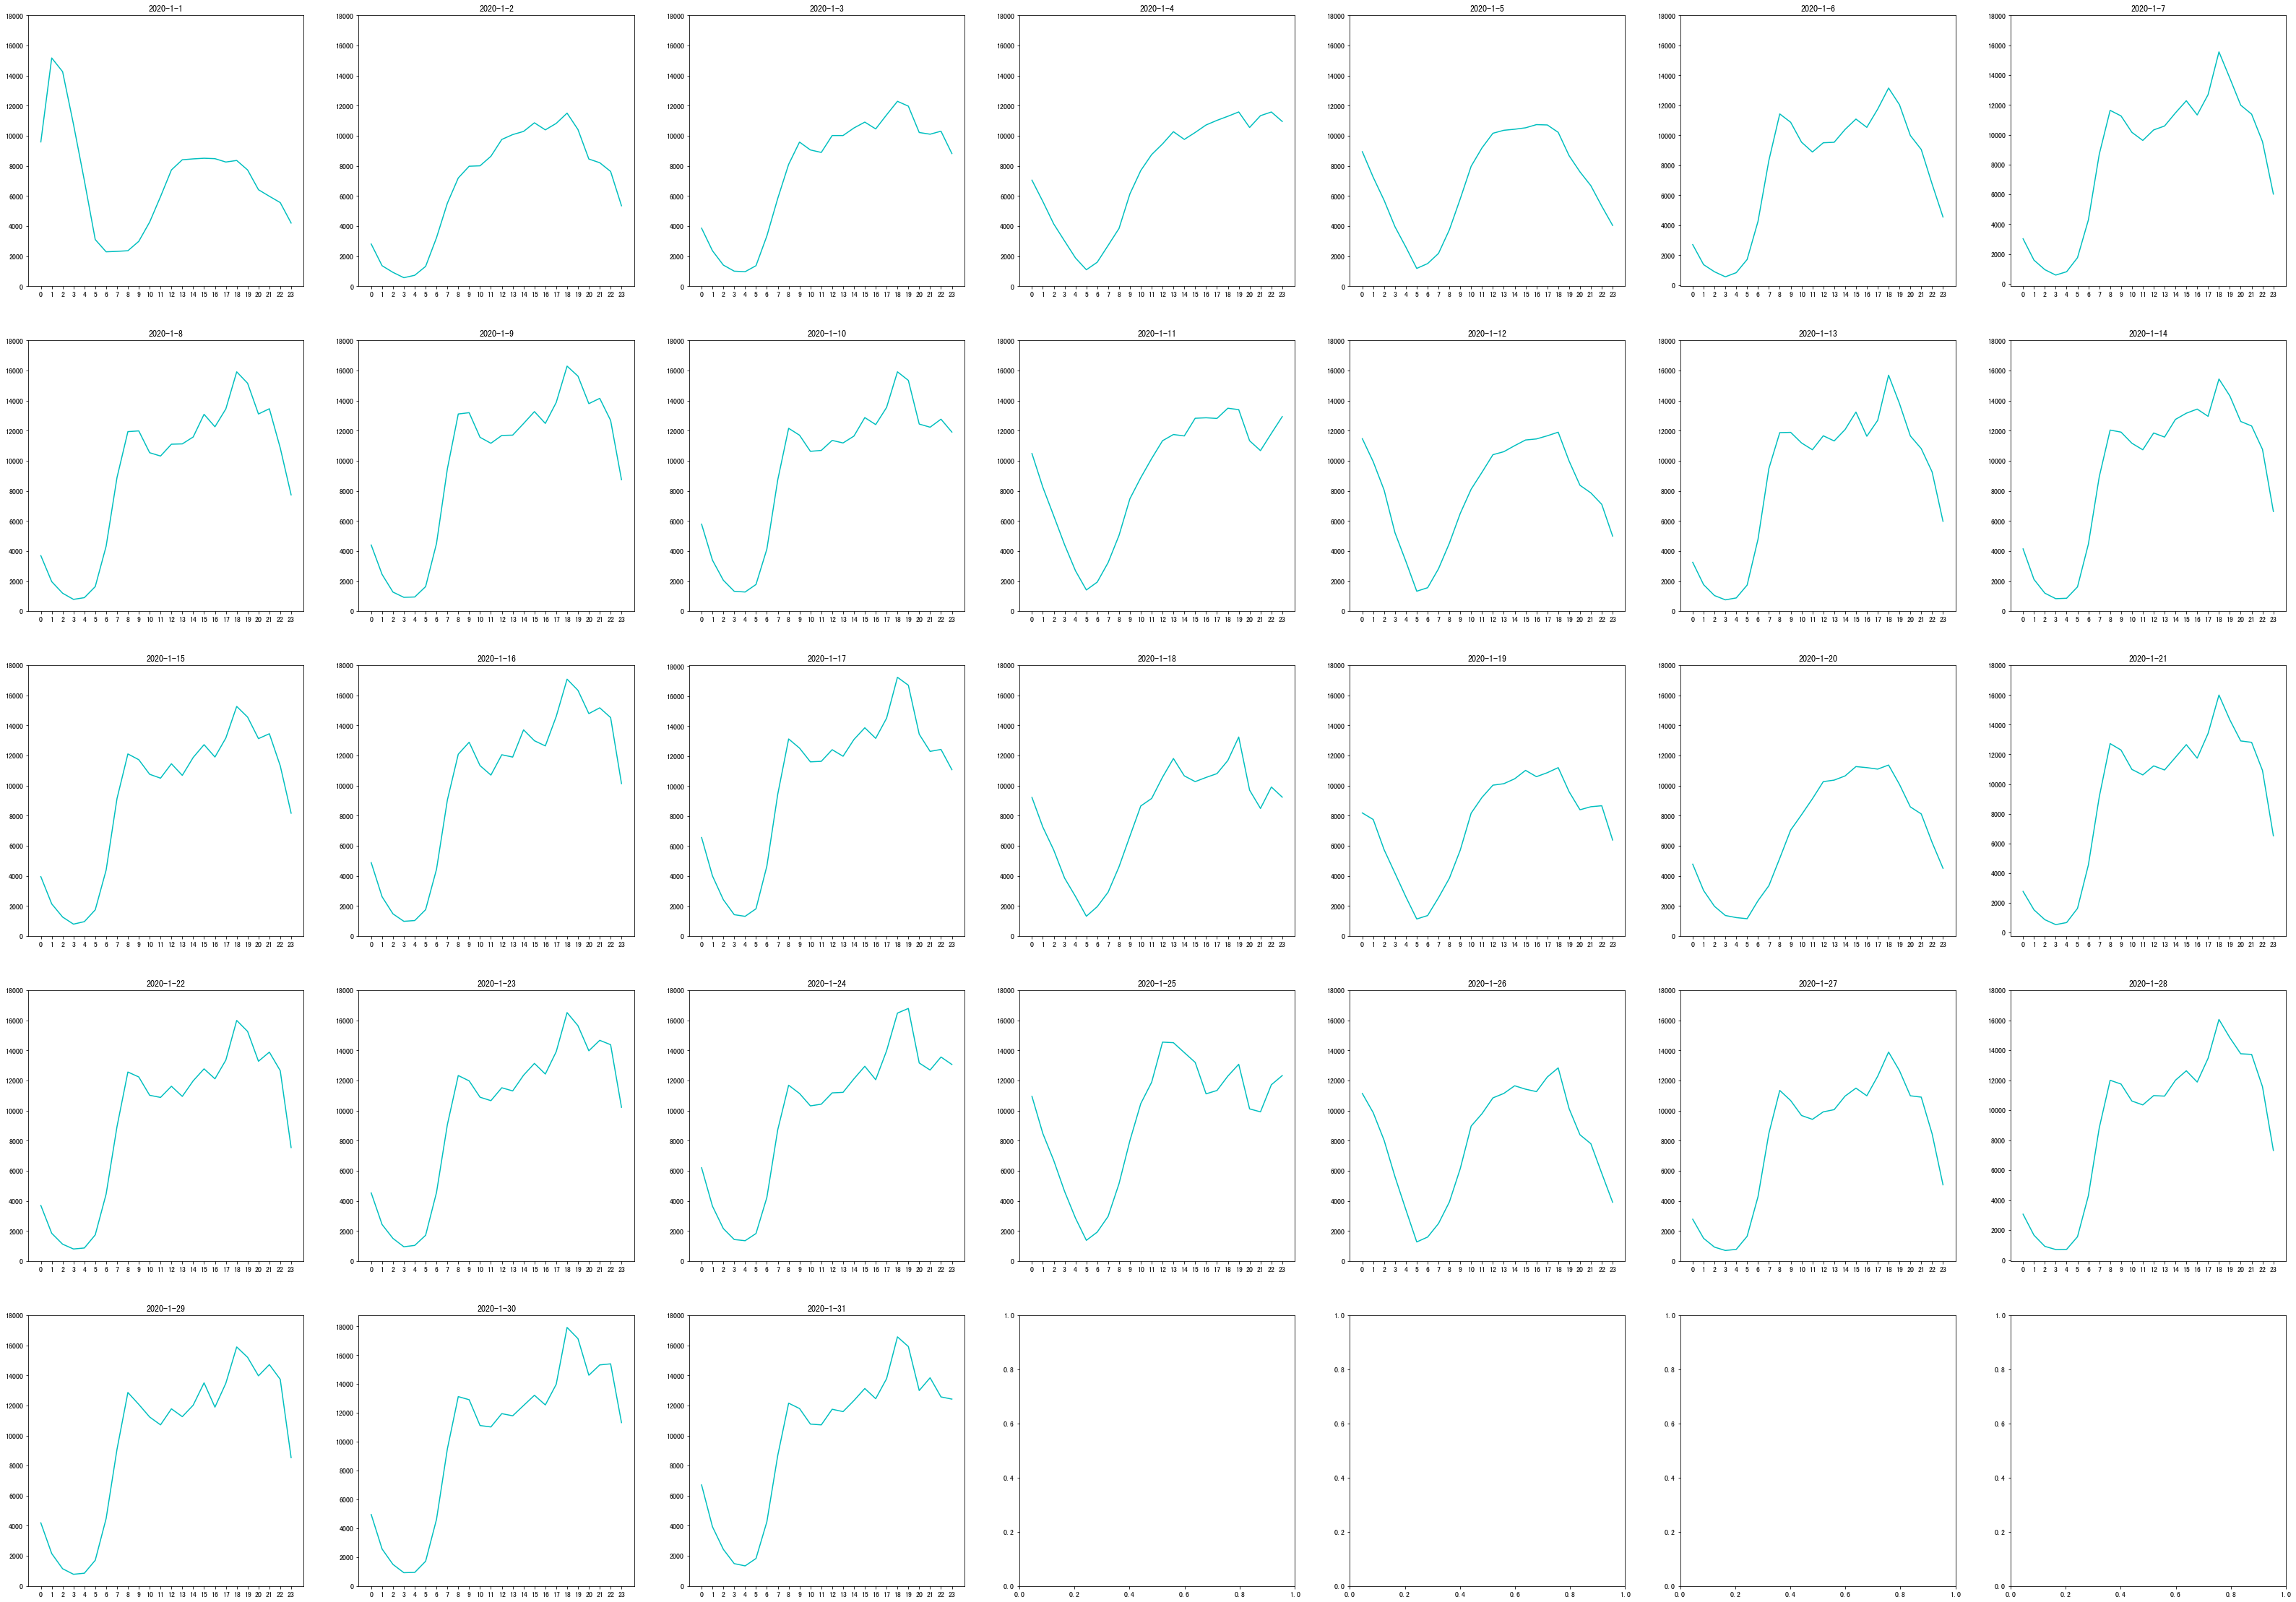

In [65]:
# 提取下客时间
df_DOTime = df[['tpep_dropoff_datetime']]

# 构造date和hour字段
df_DOTime['date'] = df_DOTime['tpep_dropoff_datetime'].apply(lambda x: x.split(' ')[0])
df_DOTime['hour'] = df_DOTime['tpep_dropoff_datetime'].apply(lambda x: x.split(' ')[1].split(':')[0])

# 计算每天各时段下客人数
df_DOTime_count = pd.DataFrame(df_DOTime.groupby(['date','hour']).count())

y_all = []
for i in range(31): # 每一天的记录
    y = df_DOTime_count[(i*24):((i+1)*24)].values # 0~23点的下车人数
    y = y.reshape(24).tolist()
    y_all.append(y)

# 可视化
fig,axes = plt.subplots(5, 7, figsize=(56, 40))
for i in range(5):
    for j in range(7):
        if (i*7 + j)>30:
            break
        ax = axes[i, j]
        x = list(range(0,24))
        y = y_all[i*7 + j]
        ax.plot(x,y,color='c')
        ax.set_xticks(x)
        ax.set_yticks(range(0,20000,2000))
        ax.set_title("2020-1-"+str(i*7 + j + 1))

通过数据观察可以看到，每天各时段的下客人数也大体上呈现两个峰值，分别是8点和18点。

### 4、哪些时间段是出租车上下客的非高峰期？

这尼玛和上一问不是一个问题吗？

### 5~8 长距离载客活动上、下客点最集中的区域在哪里？最集中的时间段是什么？

首先，我们需要定义出多长距离为长距离。

# 导入数据，并将噪声数据删除（即trip_distance<0）
data = df[['trip_distance']]
data1 = data.drop(data[data['trip_distance']<0].index)
data1

In [22]:
# 用K-means算法对距离进行聚类，分为短距离、中距离、长距离三类
estimator = KMeans(n_clusters=3)  # 构造聚类器
estimator.fit(data1)  # 聚类
label_pred = estimator.labels_  # 获取聚类标签
# 绘制k-means结果
x0 = data1[label_pred == 0]
x1 = data1[label_pred == 1]
x2 = data1[label_pred == 2]

y0 = np.ones(len(x0))
y1 = np.ones(len(x1))*2
y2 = np.ones(len(x2))*3

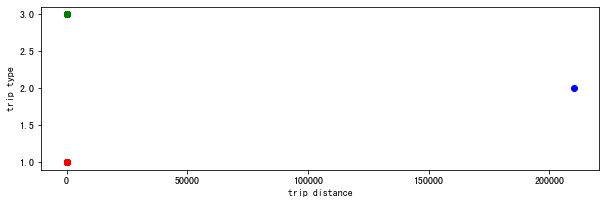

In [37]:
plt.figure(figsize=(10, 3))

plt.scatter(x0.values.reshape(1,len(x0))[0], y0, color='red', marker='o',)  
plt.scatter(x1.values.reshape(1,len(x1))[0], y1, color='blue', marker='o')  
plt.scatter(x2.values.reshape(1,len(x2))[0], y2, color='green', marker='o')  

plt.xlabel('trip distance')  
plt.ylabel('trip type')   
plt.show()  

可以看到，载客距离中出现一个高于200000英里的离群点，这对我们的聚类分析产生影响，主要是因为k-means算法采用的是平方误差准则。由于该活动记录一定属于长距离活动，所以我们先将其剔除，再进行聚类。

In [6]:
data2 = data1.drop(data1[data1['trip_distance']>200000].index)
estimator = KMeans(n_clusters=3)  # 构造聚类器
estimator.fit(data2)  # 聚类
label_pred = estimator.labels_  # 获取聚类标签
# 绘制k-means结果
x0 = data2[label_pred == 0]
x1 = data2[label_pred == 1]
x2 = data2[label_pred == 2]

y0 = np.ones(len(x0))
y1 = np.ones(len(x1))*2
y2 = np.ones(len(x2))*3

In [7]:
# 构造距离类型字典，key为距离类型，value为距离范围，是由[min,max]构成的列表
trip_type = {'短距离':[],'中距离':[],'长距离':[]}
if x0.min().values[0]<x1.min().values[0] and x0.min().values[0]<x2.min().values[0]:
    trip_type['短距离'] = [x0.min().values[0], x0.max().values[0]]
    if x1.min().values[0] < x2.min().values[0]:
        trip_type['中距离'] = [x1.min().values[0], x1.max().values[0]]
        trip_type['长距离'] = [x2.min().values[0], x2.max().values[0]]
    else:
        trip_type['中距离'] = [x2.min().values[0], x2.max().values[0]]
        trip_type['长距离'] = [x1.min().values[0], x1.max().values[0]]
elif x1.min().values[0]<x0.min().values[0] and x1.min().values[0]<x2.min().values[0]:
    trip_type['短距离'] = [x1.min().values[0], x1.max().values[0]]
    if x0.min().values[0] < x2.min().values[0]:
        trip_type['中距离'] = [x0.min().values[0], x0.max().values[0]]
        trip_type['长距离'] = [x2.min().values[0], x2.max().values[0]]
    else:
        trip_type['中距离'] = [x2.min().values[0], x2.max().values[0]]
        trip_type['长距离'] = [x0.min().values[0], x0.max().values[0]]
else:
    trip_type['短距离'] = [x2.min().values[0], x2.max().values[0]]
    if x0.min().values[0] < x1.min().values[0]:
        trip_type['中距离'] = [x0.min().values[0], x0.max().values[0]]
        trip_type['长距离'] = [x1.min().values[0], x1.max().values[0]]
    else:
        trip_type['中距离'] = [x1.min().values[0], x1.max().values[0]]
        trip_type['长距离'] = [x0.min().values[0], x0.max().values[0]]

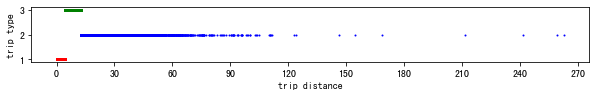

短距离的行驶距离:0.0~4.44
中距离的行驶距离:4.45~12.58
长距离的行驶距离:12.59~262.88


In [8]:
plt.figure(figsize=(10, 1))

plt.scatter(x0.values.reshape(1,len(x0))[0], y0, color='red', s=1)  
plt.scatter(x1.values.reshape(1,len(x1))[0], y1, color='blue', s=1)  
plt.scatter(x2.values.reshape(1,len(x2))[0], y2, color='green', s=1)  

plt.xticks(range(0,300,30))
plt.xlabel('trip distance')  
plt.ylabel('trip type')   
plt.show()  

print("短距离的行驶距离:{}~{}".format(trip_type['短距离'][0],trip_type['短距离'][1]))
print("中距离的行驶距离:{}~{}".format(trip_type['中距离'][0],trip_type['中距离'][1]))
print("长距离的行驶距离:{}~{}".format(trip_type['长距离'][0],trip_type['长距离'][1]))

In [9]:
data3 = pd.concat([x0,x1,x2])
def distance2type(x):
    if x >= trip_type['短距离'][0] and x <= trip_type['短距离'][1]:
        return '短距离';
    elif x >= trip_type['中距离'][0] and x <= trip_type['中距离'][1]:
        return '中距离';
    else:
        return '长距离'
data3['trip_type'] = data3['trip_distance'].apply(lambda x: "".join(distance2type(x)))

In [10]:
data4 = data3.groupby('trip_type').count().reset_index(level=0).rename(columns={'trip_distance':'count'})
data4

,trip_type,count
0,中距离,738853
1,短距离,5410396
2,长距离,253208


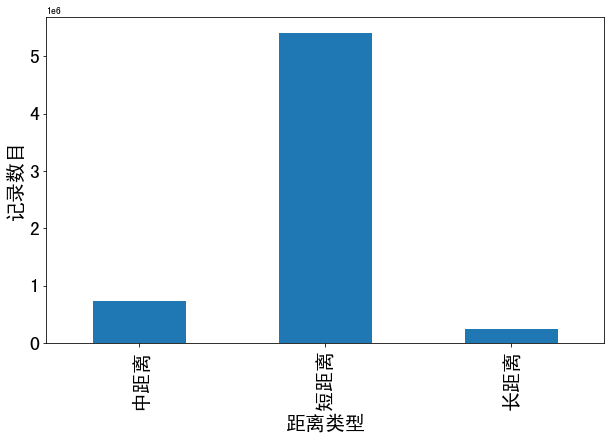

In [11]:
data4.plot(x='trip_type', y='count', kind='bar', legend=False, figsize=(10,6))
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('距离类型', fontsize=20)
plt.ylabel('记录数目', fontsize=20)
plt.show()

此聚类结果符合生活经验，故在此聚类结果上进行数据分析。

In [44]:
# 在df中挑选出长距离载客活动
df_longtrip = df.drop(df[df['trip_distance']<trip_type['长距离'][0]].index)
df_longtrip = df_longtrip[['tpep_pickup_datetime','tpep_dropoff_datetime','PULocationID','DOLocationID']]
df_longtrip

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID
69,2020-01-01 00:42:15,2020-01-01 01:16:20,185,226
131,2020-01-01 00:53:21,2020-01-01 01:16:14,132,265
179,2020-01-01 00:39:40,2020-01-01 01:03:26,262,134
223,2020-01-01 00:24:13,2020-01-01 00:57:38,138,153
238,2020-01-01 00:21:13,2020-01-01 00:50:30,132,116
...,...,...,...,...
6404985,2020-01-31 22:58:54,2020-01-31 23:39:55,140,219
6404996,2020-01-31 22:13:00,2020-01-31 23:10:00,238,210
6404998,2020-01-31 22:43:19,2020-01-31 23:14:48,242,36
6405002,2020-01-31 22:41:00,2020-01-31 23:17:00,48,64


In [45]:
# 查看各区域上客记录数量
d = {'PULocationID':df_longtrip['PULocationID'].value_counts().index, 'ncount':df_longtrip['PULocationID'].value_counts()}
df_longtrip_PULoc = pd.DataFrame(data=d).reset_index(drop=True)
df_longtrip_PULoc

,PULocationID,ncount
0,132,138400
1,138,14700
2,230,6322
3,161,5079
4,162,4025
...,...,...
249,6,1
250,27,1
251,245,1
252,96,1


In [46]:
# 查看各区域下客记录数量
d = {'DOLocationID':df_longtrip['DOLocationID'].value_counts().index, 'ncount':df_longtrip['DOLocationID'].value_counts()}
df_longtrip_DOLoc = pd.DataFrame(data=d).reset_index(drop=True)
df_longtrip_DOLoc

,DOLocationID,ncount
0,132,41676
1,1,11383
2,265,7960
3,230,7436
4,138,5125
...,...,...
254,99,13
255,253,11
256,57,11
257,111,10


In [47]:
# 上客时间段分析
df_longtrip['PUhour'] = df_longtrip['tpep_pickup_datetime'].apply(lambda x: x.split(' ')[1].split(':')[0])
df_longtrip

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID,PUhour
69,2020-01-01 00:42:15,2020-01-01 01:16:20,185,226,00
131,2020-01-01 00:53:21,2020-01-01 01:16:14,132,265,00
179,2020-01-01 00:39:40,2020-01-01 01:03:26,262,134,00
223,2020-01-01 00:24:13,2020-01-01 00:57:38,138,153,00
238,2020-01-01 00:21:13,2020-01-01 00:50:30,132,116,00
...,...,...,...,...,...
6404985,2020-01-31 22:58:54,2020-01-31 23:39:55,140,219,22
6404996,2020-01-31 22:13:00,2020-01-31 23:10:00,238,210,22
6404998,2020-01-31 22:43:19,2020-01-31 23:14:48,242,36,22
6405002,2020-01-31 22:41:00,2020-01-31 23:17:00,48,64,22


In [48]:
d = {'PUhour':df_longtrip['PUhour'].value_counts().index, 'ncount':df_longtrip['PUhour'].value_counts()}
df_longtrip_PUtime = pd.DataFrame(data=d).reset_index(drop=True).sort_values('PUhour')
df_longtrip_PUtime

,PUhour,ncount
18,00,7873
20,01,3422
23,02,1882
22,03,1953
21,04,3197
19,05,7108
13,06,8999
12,07,9451
14,08,8846
17,09,8060


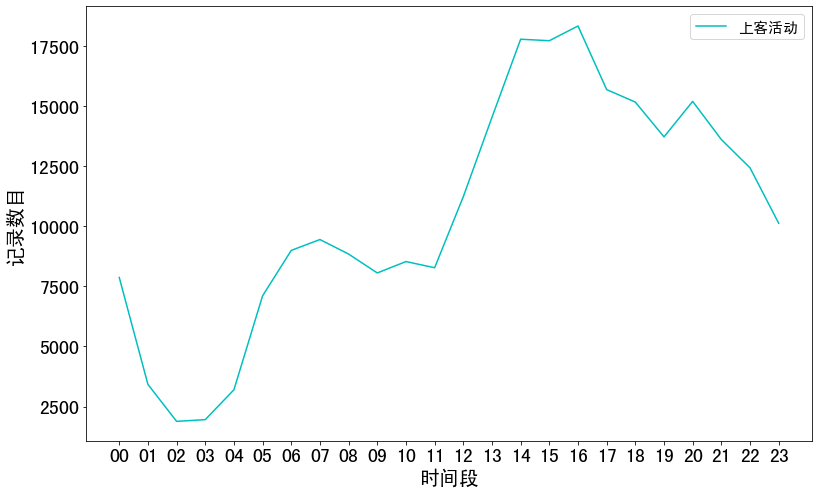

In [63]:
plt.figure(figsize=(13,8))
plt.plot(df_longtrip_PUtime.PUhour.values,df_longtrip_PUtime.ncount.values, color='c', label='上客活动')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('时间段', fontsize=20)
plt.ylabel('记录数目', fontsize=20)
plt.legend(fontsize=15)
plt.show()

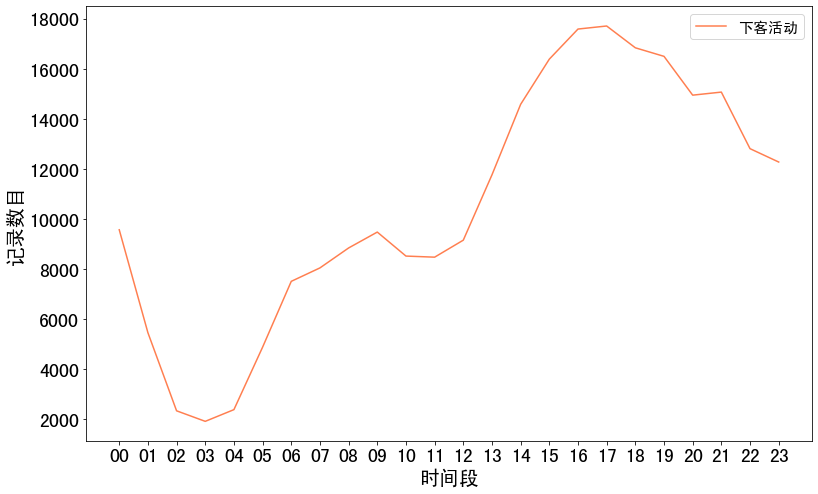

In [64]:
# 下客时间段分析
df_longtrip['DOhour'] = df_longtrip['tpep_dropoff_datetime'].apply(lambda x: x.split(' ')[1].split(':')[0])
d = {'DOhour':df_longtrip['DOhour'].value_counts().index, 'ncount':df_longtrip['DOhour'].value_counts()}
df_longtrip_DOtime = pd.DataFrame(data=d).reset_index(drop=True).sort_values('DOhour')
plt.figure(figsize=(13,8))
plt.plot(df_longtrip_DOtime.DOhour.values,df_longtrip_DOtime.ncount.values, color='coral', label='下客活动')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('时间段', fontsize=20)
plt.ylabel('记录数目', fontsize=20)
plt.legend(fontsize=15)
plt.show()

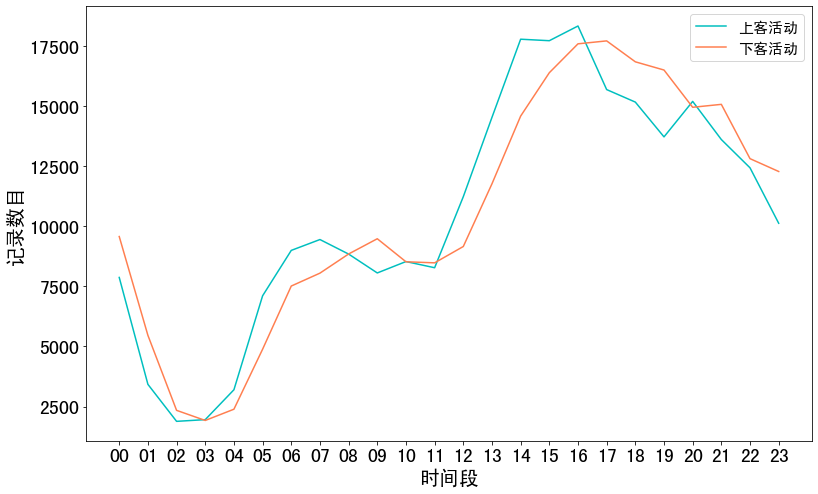

In [61]:
# 对比分析上下客时间段
plt.figure(figsize=(13, 8))
plt.plot(df_longtrip_PUtime.PUhour.values, df_longtrip_PUtime.ncount.values, color='c', label='上客活动')
plt.plot(df_longtrip_DOtime.DOhour.values, df_longtrip_DOtime.ncount.values, color='coral', label='下客活动')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('时间段', fontsize=20)
plt.ylabel('记录数目', fontsize=20)
plt.legend(fontsize=15)
plt.show()

可以看到，两条曲线基本相似，但下客时间段曲线较上客时间段右偏了一些，可以知道是因为长距离的载客活动耗时较长，导致上客和下客活动不在同一个时间段内。而且可以注意到的是，在0点时间段的下客数量比上客数量要多，分析是由于前一天凌晨上车的乘客在后一天的0点下车造成的。

### 9~12 短距离载客活动上、下客点最集中的区域在哪里？最集中的时间段是什么？

In [66]:
# 在df中挑选出短距离载客活动
df_shorttrip = df.drop(df[df['trip_distance']>trip_type['短距离'][1]].index)
df_shorttrip = df_shorttrip[['tpep_pickup_datetime','tpep_dropoff_datetime','PULocationID','DOLocationID']]
df_shorttrip

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,DOLocationID
0,2020-01-01 00:28:15,2020-01-01 00:33:03,238,239
1,2020-01-01 00:35:39,2020-01-01 00:43:04,239,238
2,2020-01-01 00:47:41,2020-01-01 00:53:52,238,238
3,2020-01-01 00:55:23,2020-01-01 01:00:14,238,151
4,2020-01-01 00:01:58,2020-01-01 00:04:16,193,193
...,...,...,...,...
6404997,2020-01-31 22:21:13,2020-01-31 22:53:56,100,148
6404999,2020-01-31 22:04:00,2020-01-31 22:34:00,137,232
6405000,2020-01-31 22:34:00,2020-01-31 22:48:00,61,36
6405001,2020-01-31 22:13:00,2020-01-31 22:23:00,37,177


In [68]:
# 查看各区域上客记录数量
d = {'PULocationID':df_shorttrip['PULocationID'].value_counts().index, 'ncount':df_shorttrip['PULocationID'].value_counts()}
df_shorttrip_PULoc = pd.DataFrame(data=d).reset_index(drop=True)
df_shorttrip_PULoc

,PULocationID,ncount
0,237,278719
1,236,256419
2,161,254923
3,162,211892
4,186,209191
...,...,...
253,172,1
254,245,1
255,251,1
256,27,1


In [69]:
# 查看各区域下客记录数量
d = {'DOLocationID':df_shorttrip['DOLocationID'].value_counts().index, 'ncount':df_shorttrip['DOLocationID'].value_counts()}
df_shorttrip_DOLoc = pd.DataFrame(data=d).reset_index(drop=True)
df_shorttrip_DOLoc

,DOLocationID,ncount
0,236,275547
1,237,255440
2,161,234469
3,170,183896
4,162,178562
...,...,...
255,30,3
256,105,2
257,245,2
258,172,1


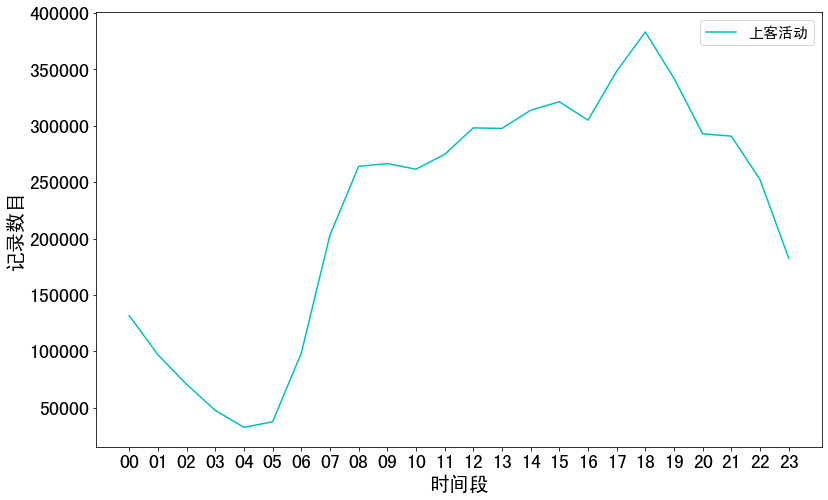

In [72]:
# 上客时间段分析
df_shorttrip['PUhour'] = df_shorttrip['tpep_pickup_datetime'].apply(lambda x: x.split(' ')[1].split(':')[0])
d = {'PUhour':df_shorttrip['PUhour'].value_counts().index, 'ncount':df_shorttrip['PUhour'].value_counts()}
df_shorttrip_PUtime = pd.DataFrame(data=d).reset_index(drop=True).sort_values('PUhour')
plt.figure(figsize=(13,8))
plt.plot(df_shorttrip_PUtime.PUhour.values,df_shorttrip_PUtime.ncount.values, color='c', label='上客活动')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('时间段', fontsize=20)
plt.ylabel('记录数目', fontsize=20)
plt.legend(fontsize=15)
plt.show()

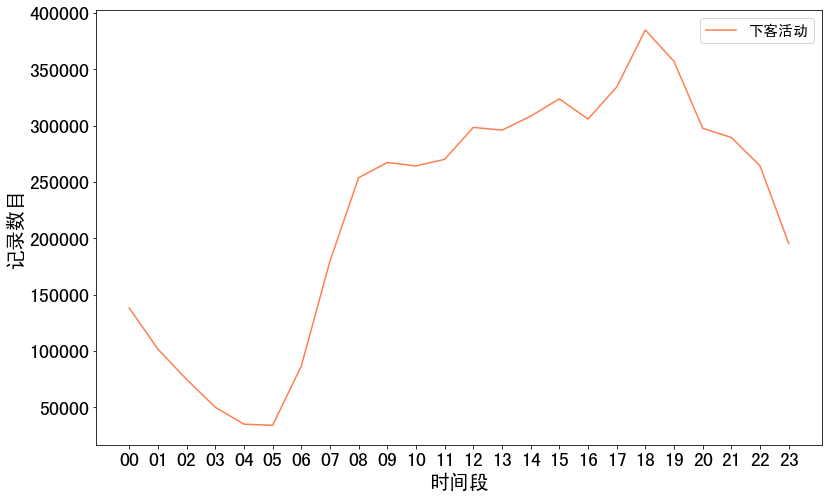

In [73]:
# 下客时间段分析
df_shorttrip['DOhour'] = df_shorttrip['tpep_dropoff_datetime'].apply(lambda x: x.split(' ')[1].split(':')[0])
d = {'DOhour':df_shorttrip['DOhour'].value_counts().index, 'ncount':df_shorttrip['DOhour'].value_counts()}
df_shorttrip_DOtime = pd.DataFrame(data=d).reset_index(drop=True).sort_values('DOhour')
plt.figure(figsize=(13,8))
plt.plot(df_shorttrip_DOtime.DOhour.values,df_shorttrip_DOtime.ncount.values, color='coral', label='下客活动')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('时间段', fontsize=20)
plt.ylabel('记录数目', fontsize=20)
plt.legend(fontsize=15)
plt.show()

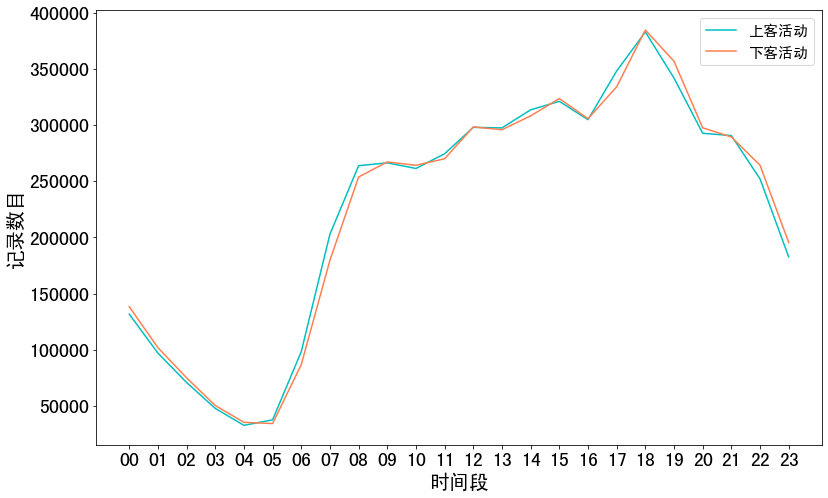

In [74]:
# 对比分析上下客时间段
plt.figure(figsize=(13, 8))
plt.plot(df_shorttrip_PUtime.PUhour.values, df_shorttrip_PUtime.ncount.values, color='c', label='上客活动')
plt.plot(df_shorttrip_DOtime.DOhour.values, df_shorttrip_DOtime.ncount.values, color='coral', label='下客活动')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('时间段', fontsize=20)
plt.ylabel('记录数目', fontsize=20)
plt.legend(fontsize=15)
plt.show()

对比短距离的上下客活动时间段，可以发现两条曲线基本重合，因为短距离活动的耗时较少，上下客基本都在同一个时间段内。